<a href="https://colab.research.google.com/github/davidofitaly/03_linear_regression_projects/blob/main/01_make_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries




In [87]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.3)

###Data generation

In [2]:
from sklearn.datasets import make_regression # Import function for synthetic regression data generation

# Generate synthetic regression data
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

# Print shapes of the generated data and target
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


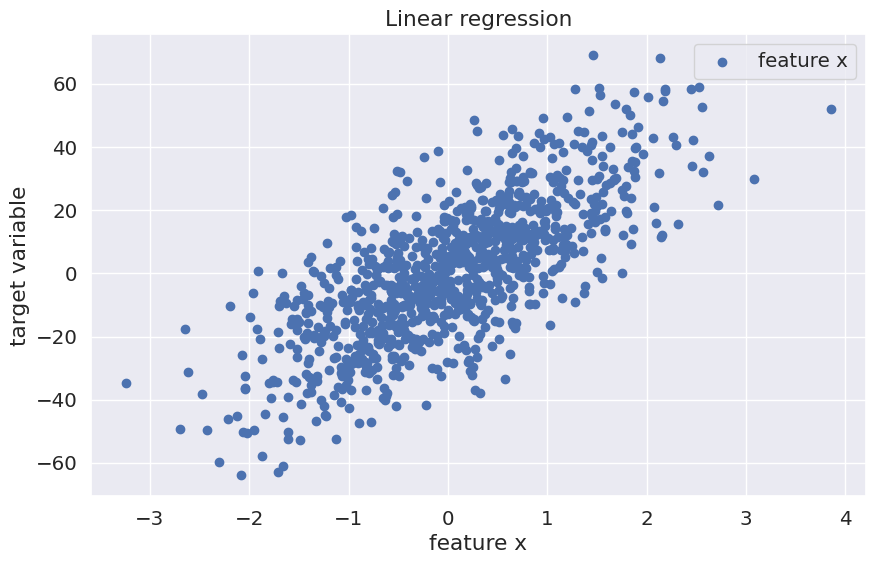

In [3]:
plt.figure(figsize=(10,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='feature x')
plt.legend()
plt.show()

###Division of data into training and test collection

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (700, 1)
X_test shape: (300, 1)
y_train shape: (700,)
y_test shape: (300,)


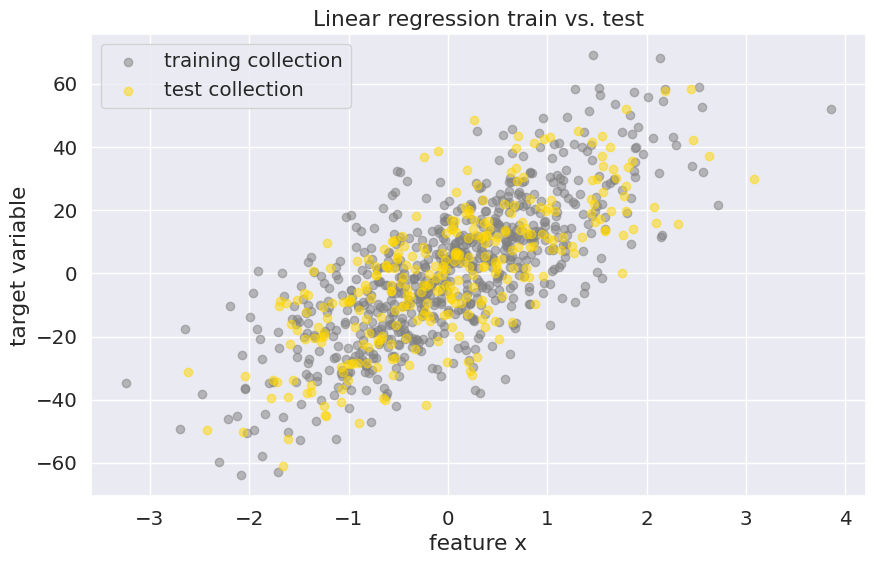

In [5]:
plt.figure(figsize=(10,6))
plt.title('Linear regression train vs. test')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.legend()
plt.show()


###Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
regressor.score(X_train, y_train)

0.5406104813486023

In [8]:
regressor.score(X_test, y_test)

0.5518417147131206

In [14]:
print(f"Intercept: {regressor.intercept_:.2f}")
print(f"Coef: {regressor.coef_[0]:.2f}")

Intercept: 0.24
Coef: 16.71


###Linear regression - training set - visualization

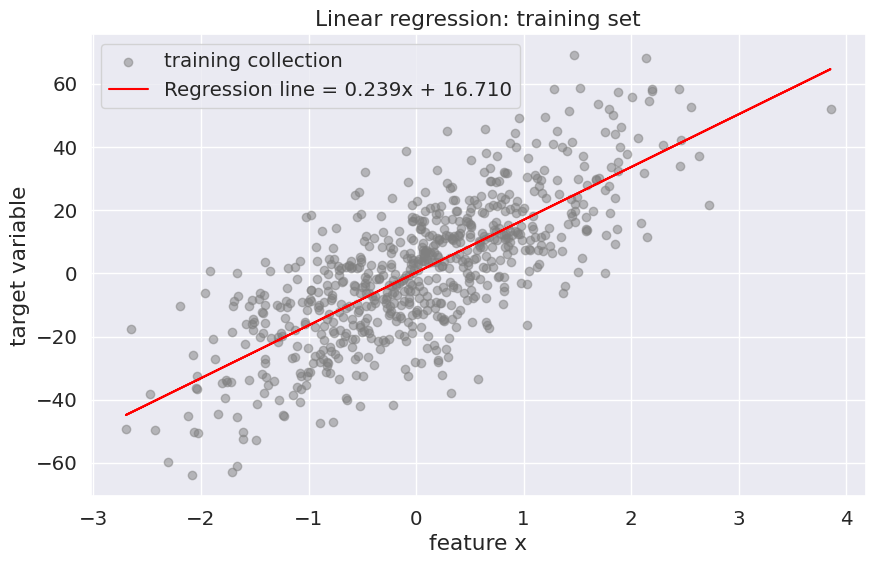

In [75]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

plt.figure(figsize=(10,6))
plt.title('Linear regression: training set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.3f}x + {slope:.3f}")
plt.legend()
plt.show()

###Linear regression - test set - visualization

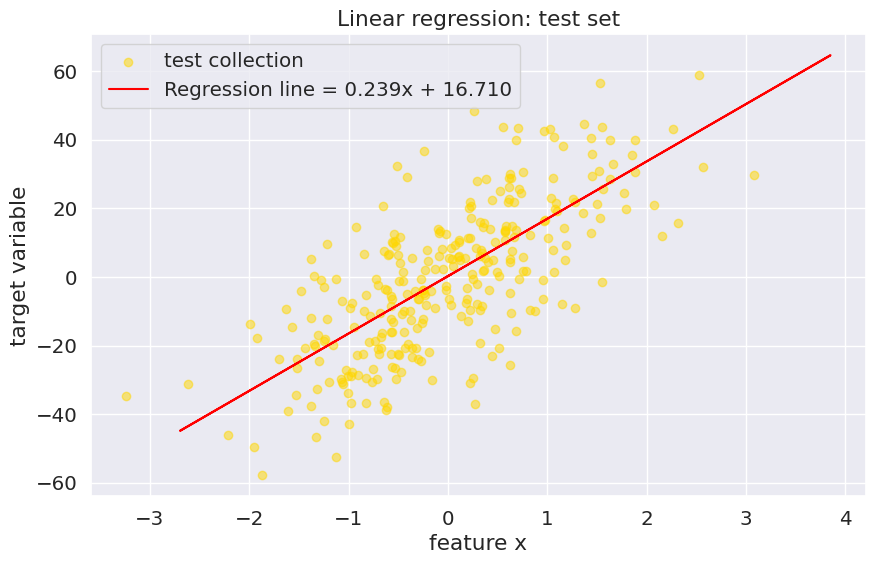

In [67]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

plt.figure(figsize=(10,6))
plt.title('Linear regression: test set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.3f}x + {slope:.3f}")
plt.legend()
plt.show()

###Model-based prediction

In [16]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,4.679599,-13.267665
1,33.386067,11.706576
2,-8.317093,6.047220
3,-40.071887,-10.417617
4,-22.465733,-26.403976


In [17]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,4.679599,-13.267665,17.947264
1,33.386067,11.706576,21.679491
2,-8.317093,6.047220,-14.364313
3,-40.071887,-10.417617,-29.654271
4,-22.465733,-26.403976,3.938242


In [18]:
predictions['error_squared'] = predictions['error'] **2
predictions.head()

,y_true,y_pred,error,error_squared
0,4.679599,-13.267665,17.947264,322.104271
1,33.386067,11.706576,21.679491,470.000328
2,-8.317093,6.047220,-14.364313,206.333486
3,-40.071887,-10.417617,-29.654271,879.375777
4,-22.465733,-26.403976,3.938242,15.509753


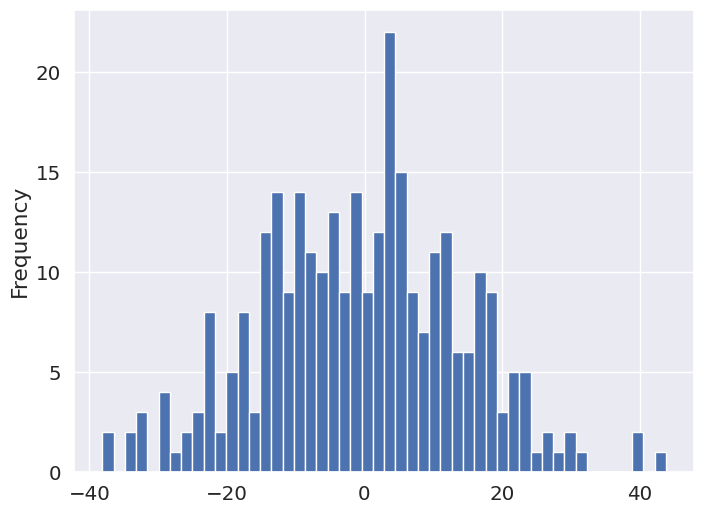

In [21]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))

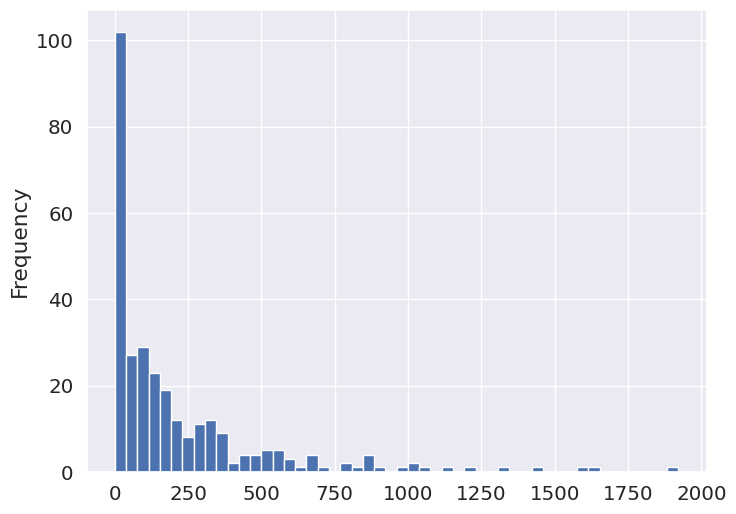

In [22]:
_ = predictions['error_squared'].plot(kind='hist', bins=50, figsize=(8,6))

###Linear regression metrics

- Mean Absolute Error

In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

11.735747382798182

- Mean Squared Error

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

213.1527938729478

- Root Mean Squared Error - RMSE

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

14.599753212741227

- Max Error

In [38]:
from sklearn.metrics import max_error

max_error(y_test, y_pred)

43.83716006356565

- R2 score - coefficient of determination

In [39]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5518417147131206

###Simple gradient method

####data preparation

In [83]:

# Przygotowanie danych
m = len(X_train)

# Przekształcenie X_train i y_train do odpowiedniego kształtu
X_train = X_train.reshape(m, 1)  # X_train już powinien mieć kształt (700, 1)
y_train = y_train.reshape(-1, 1)  # y_train przekształcamy do (700, 1)

# Dodanie kolumny z jedynkami dla bias
bias = np.ones((m, 1))
X = np.append(bias, X_train, axis=1)

# Losowa inicjalizacja parametrów
eta = 0.01
weights = np.random.randn(2, 1)

# Metoda gradientu prostego
intercept_gradient = []
coef_gradient = []

for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - y_train)  # Obliczanie gradientu
    weights -= eta * gradient  # Aktualizacja wag
    intercept_gradient.append(weights[0][0])  # Zapisanie wartości wyrazu wolnego
    coef_gradient.append(weights[1][0])  # Zapisanie wartości współczynnika

# Wydrukowanie wyników
print("Współczynniki (coef): {:.3f}".format(weights[1][0]))
print("Przesunięcie (intercept): {:3f}".format(weights[0][0]))


Współczynniki (coef): 16.763
Przesunięcie (intercept): 0.236442


16.71011298466972

###Comparison of coefficients

- before using the gradient

In [73]:
initial_df = pd.DataFrame({
    'Intercept': [intercept],
    'Coefficient': [slope]
})

initial_df
intercept_gradient[-1]

,Intercept,Coefficient
0,0.239091,16.710113


- after using a gradient

In [90]:
final_df = pd.DataFrame({
    'Intercept': [intercept_gradient[-1]],
    'Coefficient': [coef_gradient[-1]]
})

final_df

,Intercept,Coefficient
0,0.236442,16.763305


- comparison

In [102]:
results_df = pd.concat([initial_df, final_df], axis=0).reset_index(drop=True)
results_df.index = ['Before Gradient', 'After Gradient']
results_df = results_df.round(3)

results_df

,Intercept,Coefficient
Before Gradient,0.239,16.710
After Gradient,0.236,16.763
